In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

# from os import chdir
# chdir('/content/drive/MyDrive/Machine Learning Project')

In [6]:
from sklearn.model_selection import train_test_split, cross_validate
from utils import load_data

from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data = load_data()
X, y = data.drop(columns=['subreddit','author','date','post']), data['subreddit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Random Forest

In [4]:
from sklearn import ensemble

In [10]:
rf = ensemble.RandomForestClassifier(min_samples_leaf=0.05, max_features='sqrt', oob_score=True, random_state=0)

results = cross_validate(rf, X_train, y_train, cv=5, return_train_score=True, n_jobs=-1)

In [11]:
results

{'fit_time': array([176.49696684, 176.27687502, 175.58654404, 176.25390482,
        169.84191275]),
 'score_time': array([1.3611052 , 1.3591392 , 1.74414992, 1.37579918, 1.80027103]),
 'test_score': array([0.29405544, 0.29531034, 0.29642424, 0.29421054, 0.29706293]),
 'train_score': array([0.29354888, 0.29450063, 0.29649579, 0.29488486, 0.29839119])}

In [ ]:
rf = ensemble.RandomForestClassifier(min_samples_leaf=0.05, max_features='sqrt', oob_score=True, random_state=0)
oob_error = []
num_trees = np.arange(20, 200, 10)

for m in tqdm(num_trees):
    rf.set_params(n_estimators=m)
    model = rf.fit(X, y)
    oob_error.append(1-model.oob_score_)

  0%|          | 0/18 [00:00<?, ?it/s]/Users/waterdamage123/.pyenv/versions/3.12.4/envs/ml_uni/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
100%|██████████| 18/18 [13:33<00:00, 45.18s/it]


In [ ]:
plt.scatter(alphas_to_use,  train_scores, label='Training', cmap='Blues')
plt.scatter(alphas_to_use,  val_scores, label='Validation', cmap='Blues')
plt.legend()
plt.xlabel('ccp_alpha')
plt.ylabel('accuracy')

Text(0.5, 0, 'Number of trees')

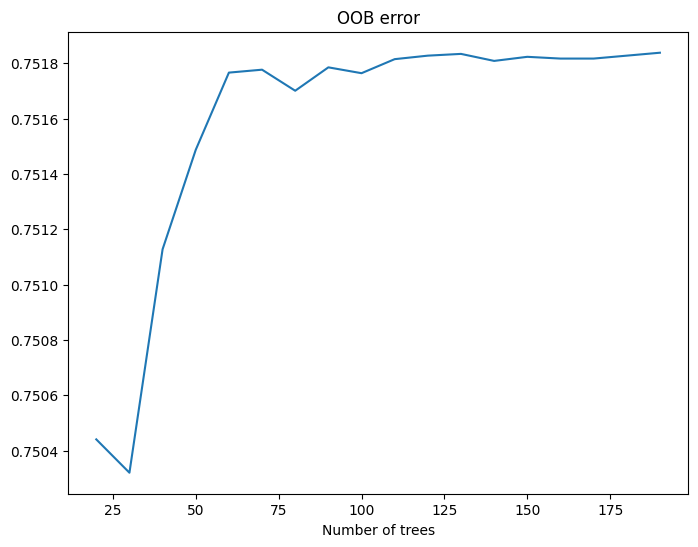

In [14]:
plt.figure(figsize=(8,6))
plt.plot(num_trees, oob_error)
plt.title('OOB error')
plt.xlabel('Number of trees')

In [31]:
m = num_trees[np.argmin(oob_error)]
rf.set_params(n_estimators=m)
model = rf.fit(X, y)

In [33]:
m

np.int64(30)

In [36]:
n_relevant_features = model.feature_importances_[model.feature_importances_ >= 0.01].shape[0]

/Users/waterdamage123/.pyenv/versions/3.12.4/envs/ml_uni/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


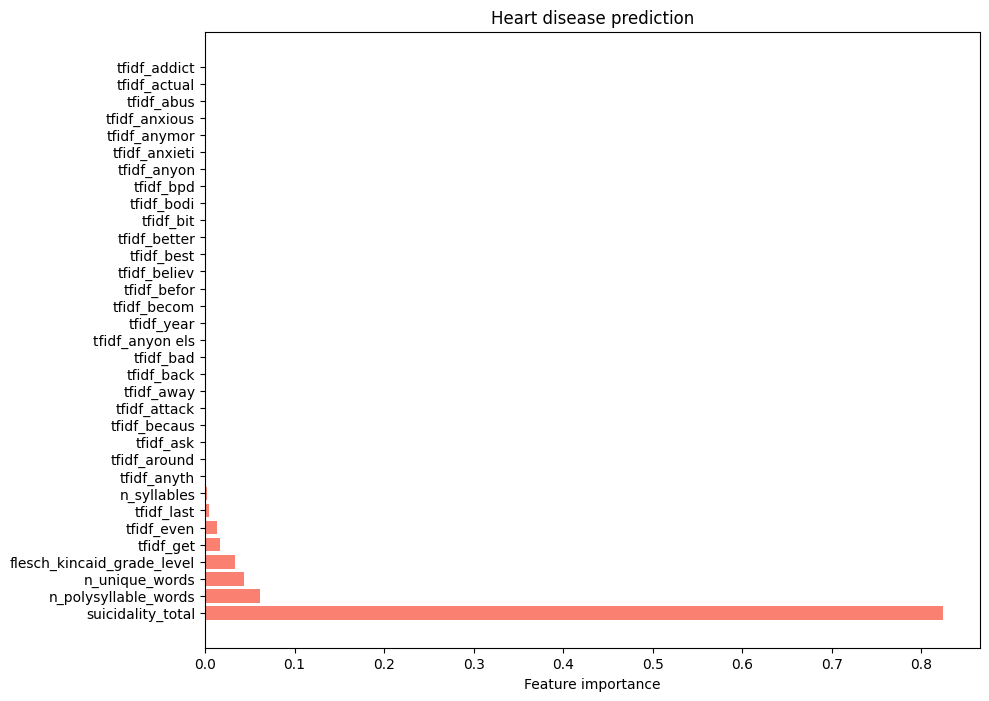

In [38]:
m = np.argmin(oob_error)
rf.set_params(n_estimators=m)
model = rf.fit(X, y)
fig, ax = plt.subplots(figsize=(10,8))
inds = np.argsort(model.feature_importances_)
inds = np.flip(inds)[:n_relevant_features]
ax.barh(np.arange(n_relevant_features), model.feature_importances_[inds], color='salmon')
ax.set_yticks(np.arange(n_relevant_features))
_ = ax.set_yticklabels(X.columns[inds])
_ = ax.set_xlabel('Feature importance')
_ = ax.set_title('Heart disease prediction')

## Undersampled Data

In [1]:
from utils import load_undersampled_split_data

X_train, X_test, y_train, y_test = load_undersampled_split_data()

In [2]:
y_train

148968     EDAnonymous
150490     EDAnonymous
273714     EDAnonymous
274792     EDAnonymous
272105     EDAnonymous
              ...     
22655     suicidewatch
12514     suicidewatch
455189    suicidewatch
29013     suicidewatch
27691     suicidewatch
Name: subreddit, Length: 83232, dtype: object

In [7]:
rf = ensemble.RandomForestClassifier(min_samples_leaf=0.05, max_features='sqrt', oob_score=True, random_state=0)

results = cross_validate(rf, X_train, y_train, cv=5, return_train_score=True, n_jobs=-1)

In [8]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 0.05,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': True,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [ ]:
results

{'fit_time': array([176.49696684, 176.27687502, 175.58654404, 176.25390482,
        169.84191275]),
 'score_time': array([1.3611052 , 1.3591392 , 1.74414992, 1.37579918, 1.80027103]),
 'test_score': array([0.29405544, 0.29531034, 0.29642424, 0.29421054, 0.29706293]),
 'train_score': array([0.29354888, 0.29450063, 0.29649579, 0.29488486, 0.29839119])}

In [10]:
rf = ensemble.RandomForestClassifier(max_features='sqrt', oob_score=True, random_state=0)
oob_error = []
num_trees = np.arange(20, 200, 10)

for m in tqdm(num_trees):
    rf.set_params(n_estimators=m)
    model = rf.fit(X_train, y_train)
    oob_error.append(1-model.oob_score_)

  0%|          | 0/18 [00:00<?, ?it/s]

/Users/waterdamage123/.pyenv/versions/3.12.4/envs/ml_uni/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
100%|██████████| 18/18 [22:44<00:00, 75.80s/it] 


Text(0.5, 0, 'Number of trees')

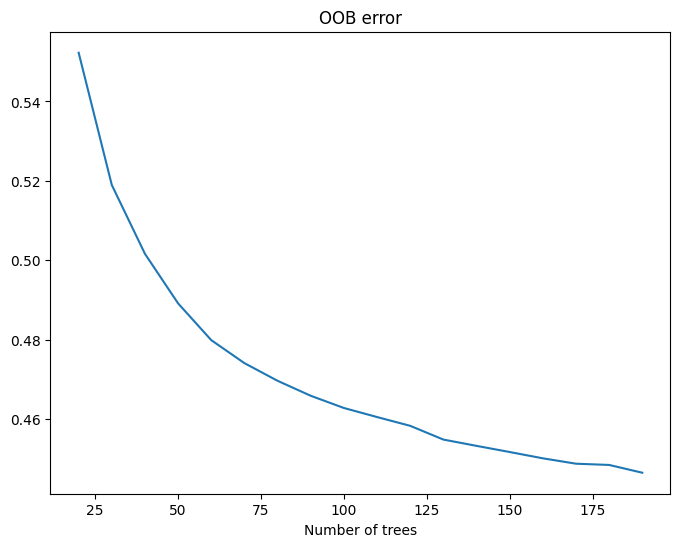

In [11]:
plt.figure(figsize=(8,6))
plt.plot(num_trees, oob_error)
plt.title('OOB error')
plt.xlabel('Number of trees')

In [13]:
m = num_trees[np.argmin(oob_error)]
rf.set_params(n_estimators=m)
model = rf.fit(X_train, y_train)

In [22]:
rf.score(X_test, y_test)

0.47910308579179384

In [20]:
import pickle

pickle.dump(model, open('models/undersampling/190trees_random_forest.pkl', 'wb'))

In [14]:
m

np.int64(190)

In [15]:
n_relevant_features = model.feature_importances_[model.feature_importances_ >= 0.01].shape[0]

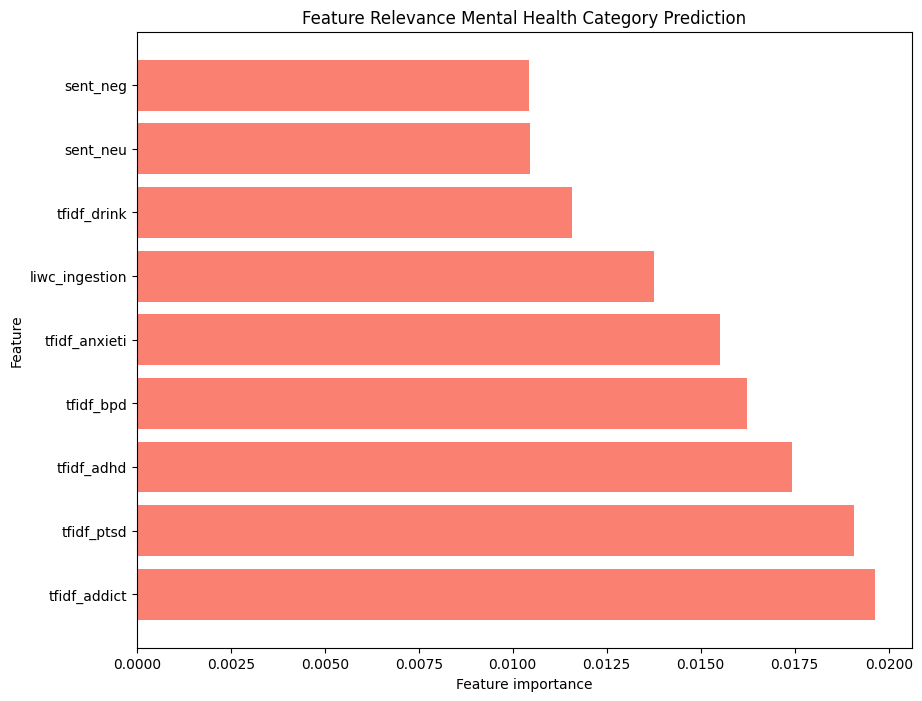

In [19]:
fig, ax = plt.subplots(figsize=(10,8))
inds = np.argsort(model.feature_importances_)
inds = np.flip(inds)[:n_relevant_features]
ax.barh(np.arange(n_relevant_features), model.feature_importances_[inds], color='salmon')
ax.set_yticks(np.arange(n_relevant_features))
_ = ax.set_yticklabels(X_train.columns[inds])
_ = ax.set_ylabel("Feature")
_ = ax.set_xlabel('Feature importance')
_ = ax.set_title('Feature Relevance Mental Health Category Prediction')

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/waterdamage123/.pyenv/versions/3.12.4/envs/ml_uni/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/waterdamage123/.pyenv/versions/3.12.4/envs/ml_uni/lib/python3.12/site-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/Users/waterdamage123/.pyenv/versions/3.12.4/envs/ml_uni/lib/python3.12/site-packages/xgboost/sklearn.py", line 1491, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15], got ['EDAnonymous' 'addiction' 'adhd' 'alcoholism' 'anxiety' 'autism'
 'bipolarreddit' 'bpd' 'depression' 'healthanxiety' 'lonely'
 'mentalhealth' 'ptsd' 'schizophrenia' 'socialanxiety' 'suicidewatch']
